In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [3]:
df = spark.read.csv('C:\\Users\\admin\\Desktop\\spark-data\\Telco-Customer-Churn.csv',inferSchema=True,header=True)

In [4]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [5]:
df.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

In [6]:
import pandas as pd

In [7]:
df.dtypes

[('customerID', 'string'),
 ('gender', 'string'),
 ('SeniorCitizen', 'int'),
 ('Partner', 'string'),
 ('Dependents', 'string'),
 ('tenure', 'int'),
 ('PhoneService', 'string'),
 ('MultipleLines', 'string'),
 ('InternetService', 'string'),
 ('OnlineSecurity', 'string'),
 ('OnlineBackup', 'string'),
 ('DeviceProtection', 'string'),
 ('TechSupport', 'string'),
 ('StreamingTV', 'string'),
 ('StreamingMovies', 'string'),
 ('Contract', 'string'),
 ('PaperlessBilling', 'string'),
 ('PaymentMethod', 'string'),
 ('MonthlyCharges', 'double'),
 ('TotalCharges', 'string'),
 ('Churn', 'string')]

In [9]:
df.count()

7043

In [10]:
from pyspark.sql.functions import isnan,when,count,col

df.select([count(when(isnan(c)|col(c).isNull(),c)).alias(c) for c in df.columns]).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|         0|     0|            0|      0|         0|     0|           0|            0|              0|             0|           0|               0|          0|          0|              0|       0|               0| 

In [11]:
df.createOrReplaceTempView("churn_analysis")

In [13]:
spark.sql("show tables").show()

+--------+--------------+-----------+
|database|     tableName|isTemporary|
+--------+--------------+-----------+
|        |churn_analysis|       true|
+--------+--------------+-----------+



In [14]:
pd_df = df.toPandas()

In [15]:
pd_df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [16]:
pd_df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [17]:
pd_df.shape

(7043, 21)

In [18]:
pd_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int32  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int32  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


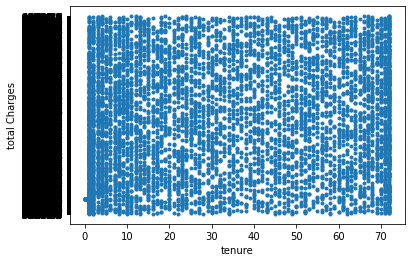

In [22]:
import matplotlib.pyplot as plt

plt.plot(pd_df['tenure'],pd_df['TotalCharges'],'.')
plt.xlabel('tenure')
plt.ylabel('total Charges')
plt.show()

In [23]:
spark.sql('select * from churn_analysis').show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|  

In [24]:
df.groupby('churn').count().show()

+-----+-----+
|churn|count|
+-----+-----+
|   No| 5174|
|  Yes| 1869|
+-----+-----+



In [25]:
df.select('tenure','TotalCharges','MonthlyCharges').describe().show()

+-------+------------------+------------------+------------------+
|summary|            tenure|      TotalCharges|    MonthlyCharges|
+-------+------------------+------------------+------------------+
|  count|              7043|              7043|              7043|
|   mean| 32.37114865824223|2283.3004408418697| 64.76169246059922|
| stddev|24.559481023094442| 2266.771361883145|30.090047097678482|
|    min|                 0|                  |             18.25|
|    max|                72|             999.9|            118.75|
+-------+------------------+------------------+------------------+



In [26]:
spark.sql('select gender,churn, count(*) from churn_analysis group by gender ,churn').show()

+------+-----+--------+
|gender|churn|count(1)|
+------+-----+--------+
|  Male|   No|    2625|
|  Male|  Yes|     930|
|Female|   No|    2549|
|Female|  Yes|     939|
+------+-----+--------+



In [34]:
df.groupby('gender').pivot('churn').agg()

AssertionError: exprs should not be empty

In [30]:
pivot_df = df.groupBy('gender').pivot('churn')

pivot_df.show()

AttributeError: 'GroupedData' object has no attribute 'show'

In [35]:
spark.sql('select SeniorCitizen,churn, count(*) from churn_analysis group by SeniorCitizen ,churn').show()

+-------------+-----+--------+
|SeniorCitizen|churn|count(1)|
+-------------+-----+--------+
|            1|   No|     666|
|            0|   No|    4508|
|            0|  Yes|    1393|
|            1|  Yes|     476|
+-------------+-----+--------+



In [36]:
df.stat.crosstab('SeniorCitizen','InternetService').show()

+-----------------------------+----+-----------+----+
|SeniorCitizen_InternetService| DSL|Fiber optic|  No|
+-----------------------------+----+-----------+----+
|                            1| 259|        831|  52|
|                            0|2162|       2265|1474|
+-----------------------------+----+-----------+----+



In [37]:
pd_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
df.stat.freqItems(["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'],0.6).collect()

[Row(PhoneService_freqItems=['Yes'], MultipleLines_freqItems=['Yes'], InternetService_freqItems=['Fiber optic'], OnlineSecurity_freqItems=['No'], OnlineBackup_freqItems=['Yes'], DeviceProtection_freqItems=['No'], TechSupport_freqItems=['No'], StreamingTV_freqItems=['Yes'], StreamingMovies_freqItems=['No'])]

In [42]:
spark.sql("select PaperlessBilling,churn, count(*) from churn_analysis group by PaperlessBilling, churn").show()

+----------------+-----+--------+
|PaperlessBilling|churn|count(1)|
+----------------+-----+--------+
|             Yes|  Yes|    1400|
|              No|   No|    2403|
|             Yes|   No|    2771|
|              No|  Yes|     469|
+----------------+-----+--------+



In [45]:
spark.sql("select PaymentMethod,churn, count(*) from churn_analysis group by PaymentMethod, churn").show(truncate=False)

+-------------------------+-----+--------+
|PaymentMethod            |churn|count(1)|
+-------------------------+-----+--------+
|Credit card (automatic)  |No   |1290    |
|Bank transfer (automatic)|No   |1286    |
|Mailed check             |Yes  |308     |
|Credit card (automatic)  |Yes  |232     |
|Electronic check         |No   |1294    |
|Electronic check         |Yes  |1071    |
|Bank transfer (automatic)|Yes  |258     |
|Mailed check             |No   |1304    |
+-------------------------+-----+--------+



In [46]:
churn_df = df

In [47]:
train_data,test_data = churn_df.randomSplit([0.7,0.3],24)

print("Training Data : ",str(train_data.count()))
print("Test data : ", str(test_data.count()))

Training Data :  4916
Test data :  2127


In [48]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoderEstimator,StringIndexer,VectorAssembler

catColumns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling',
       'PaymentMethod']



In [49]:
stages = []

for catCol in catColumns:
    print(catCol)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod


In [50]:
for catCol in catColumns:
    stringIndexer = StringIndexer(inputCol=catCol,outputCol=catCol+"Index")
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()],outputCols=[catCol+"catVec"])
    stages += [stringIndexer, encoder]

In [51]:
stages

[StringIndexer_e78d8f45b476,
 OneHotEncoderEstimator_87b119fde107,
 StringIndexer_888371ebf042,
 OneHotEncoderEstimator_aa0ee182dab8,
 StringIndexer_4a30597358eb,
 OneHotEncoderEstimator_c34373224b83,
 StringIndexer_1ba88671b29b,
 OneHotEncoderEstimator_b296cf0ab3a3,
 StringIndexer_93564201530f,
 OneHotEncoderEstimator_d71e2c3f618b,
 StringIndexer_20fc4ac52d9c,
 OneHotEncoderEstimator_66fd2c89e8f5,
 StringIndexer_92d9fef2cfb2,
 OneHotEncoderEstimator_09583467faf3,
 StringIndexer_6f87ae0f99df,
 OneHotEncoderEstimator_b7b058c8f57f,
 StringIndexer_d571517e928b,
 OneHotEncoderEstimator_f5dfdeefd41c,
 StringIndexer_299b004f6b55,
 OneHotEncoderEstimator_69aff260470f,
 StringIndexer_966844ea9214,
 OneHotEncoderEstimator_63a2c399918b,
 StringIndexer_19ab926a3cf4,
 OneHotEncoderEstimator_41eddd94b3d2,
 StringIndexer_d8e3be3fa1e9,
 OneHotEncoderEstimator_b5e05f7cdaa8,
 StringIndexer_fa709b7452e5,
 OneHotEncoderEstimator_23f205144787,
 StringIndexer_d79f2d8bf2fb,
 OneHotEncoderEstimator_b14704d7a

In [52]:
from pyspark.ml.feature import Imputer

imputer = Imputer(inputCols=["TotalCharges"],outputCols=["Out_TotalCharges"])

stages += [imputer]

In [55]:
label_idx = StringIndexer(inputCol='Churn',outputCol='label')

stages += [label_idx]

In [56]:
temp = label_idx.fit(train_data).transform(train_data)

In [57]:
temp.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|label|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+-----+
|0004-TLHLJ|  Male|            0|     No|  

In [58]:
df.stat.corr('MonthlyCharges','TotalCharges')

IllegalArgumentException: 'requirement failed: Currently correlation calculation for columns with dataType string not supported.'

In [59]:
label_idx

StringIndexer_1fabc3154ee1

In [60]:
numericalCol = ['tenure_bin','Out_TotalCharges','MonthlyCharges']

In [61]:
assemblerInputs = [ c + "catVec" for c in catColumns] + numericalCol
assembler = VectorAssembler(inputCols=assemblerInputs,outputCol="features")
stages += [assembler]

In [ ]:
pipeline = Pipeline().setStages(stages)
pipelineModel = pipeline